In [1]:
# Import libraries
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [2]:
data=pd.read_csv('Airlines+Data.csv')
df=pd.DataFrame(data)
df

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


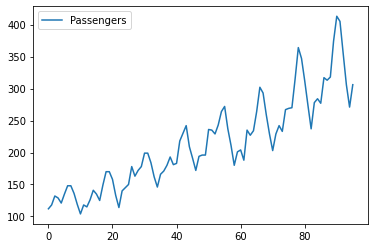

In [3]:
df.plot()
pyplot.show()

#### from above line plot we can see that number of passengers increased over years

array([[<AxesSubplot:title={'center':'Passengers'}>]], dtype=object)

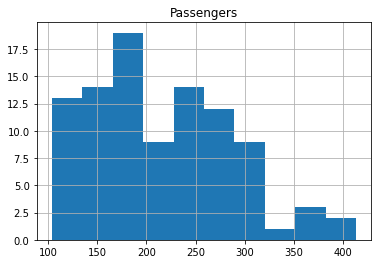

In [4]:
df.hist()

<AxesSubplot:ylabel='Density'>

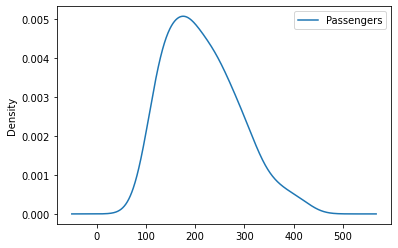

In [5]:
df.plot(kind='kde')

In [6]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96 non-null     object
 1   Passengers  96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [8]:
df.isna().sum()

Month         0
Passengers    0
dtype: int64

In [9]:
months=['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
n=df['Month'][0]
n[0:3]

'Jan'

In [10]:
df['months']=0
df['months']

0     0
1     0
2     0
3     0
4     0
     ..
91    0
92    0
93    0
94    0
95    0
Name: months, Length: 96, dtype: int64

In [11]:
for i in range(96):
    n=df['Month'][i]
    df['months'][i]=n[0:3]
df['months']

c:\users\damanjeet kaur.laptop-b5chj9sc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\damanjeet kaur.laptop-b5chj9sc\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


0     Jan
1     Feb
2     Mar
3     Apr
4     May
     ... 
91    Aug
92    Sep
93    Oct
94    Nov
95    Dec
Name: months, Length: 96, dtype: object

In [12]:
dum=pd.get_dummies(df['Month'])
dum

,Apr-00,Apr-01,Apr-02,Apr-95,Apr-96,Apr-97,Apr-98,Apr-99,Aug-00,Aug-01,...,Oct-98,Oct-99,Sep-00,Sep-01,Sep-02,Sep-95,Sep-96,Sep-97,Sep-98,Sep-99
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
93,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
data_df=pd.DataFrame(dum)
data2=pd.concat((df,dum),axis=1)
data2

,Month,Passengers,months,Apr-00,Apr-01,Apr-02,Apr-95,Apr-96,Apr-97,Apr-98,...,Oct-98,Oct-99,Sep-00,Sep-01,Sep-02,Sep-95,Sep-96,Sep-97,Sep-98,Sep-99
0,Jan-95,112,Jan,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Feb-95,118,Feb,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Mar-95,132,Mar,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Apr-95,129,Apr,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,May-95,121,May,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Aug-02,405,Aug,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,Sep-02,355,Sep,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
93,Oct-02,306,Oct,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94,Nov-02,271,Nov,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
log_pas=np.log(data2['Passengers'])
data2['log_pas']=log_pas
data2

,Month,Passengers,months,Apr-00,Apr-01,Apr-02,Apr-95,Apr-96,Apr-97,Apr-98,...,Oct-99,Sep-00,Sep-01,Sep-02,Sep-95,Sep-96,Sep-97,Sep-98,Sep-99,log_pas
0,Jan-95,112,Jan,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.718499
1,Feb-95,118,Feb,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.770685
2,Mar-95,132,Mar,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.882802
3,Apr-95,129,Apr,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,4.859812
4,May-95,121,May,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Aug-02,405,Aug,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.003887
92,Sep-02,355,Sep,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,5.872118
93,Oct-02,306,Oct,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.723585
94,Nov-02,271,Nov,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.602119


### Now we will evaluate our model with different methods and find out the best rmse value

#### Spliting data into train and test

In [20]:
train = data2.head(84)
test = data2.tail(12)

## Moving Average

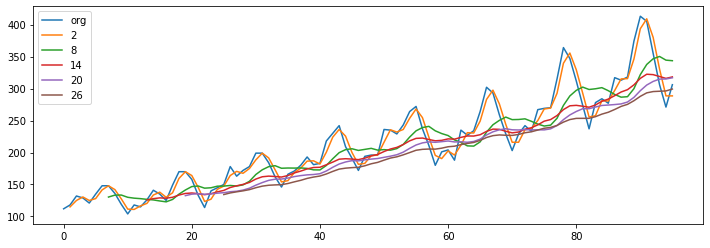

In [21]:
plt.figure(figsize=(12,4))
data2.Passengers.plot(label="org")
for i in range(2,30,6):
    data2["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

### In the above plot
#### Blue line is the original data
#### Orange line- when window size increased to 2 some of noise reduced
#### Green line- when window size incresed to 8 noise reduced 
#### As as window size increases data become more linear so Brown line shows more linear data and reduced noise 

## Time series decomposition plot 

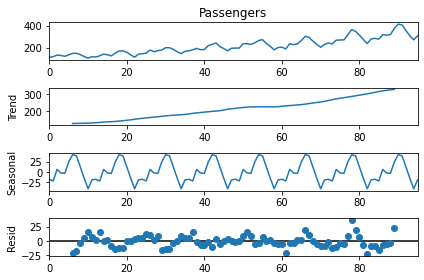

In [22]:
decompose_ts_add = seasonal_decompose(data2.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

### it shows upward trend and seasonality

# ACF plots and PACF plots

c:\users\damanjeet kaur.laptop-b5chj9sc\appdata\local\programs\python\python37\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


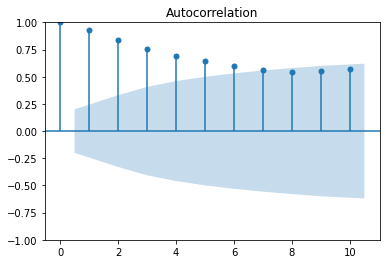

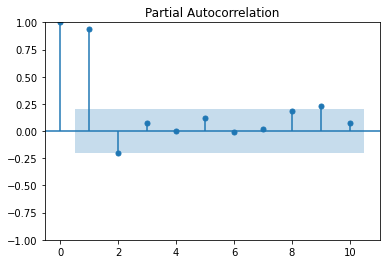

In [23]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data2.Passengers,lags=10)
tsa_plots.plot_pacf(data2.Passengers,lags=10)
plt.show()

### from the above AFC plot we will discard 1st lag and next 6 lags are above blue area so p = 6 
### and in PACF we will discard 1st lag and next lag is above blue area so q = 1

### Evaluation Metric MAPE

In [24]:
#mean absolute percentage error
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method

In [25]:
ses_model = SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_ses,test.Passengers) 

13.411274740513823

### Holt method 

In [26]:
# Holt method 
hw_model = Holt(train["Passengers"]).fit(smoothing_level=0.8 , smoothing_slope=0.2) #lev=alpha nd slope=beeta even if we dont give these values model will apply on its own
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hw,test.Passengers) 

c:\users\damanjeet kaur.laptop-b5chj9sc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  


23.53071965210063

## Holts winter exponential smoothing with additive seasonality and additive trend

In [27]:
hwe_model_add_add = ExponentialSmoothing(train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_add_add,test.Passengers) 

5.7312563804602705

## Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [28]:
hwe_model_mul_add = ExponentialSmoothing(train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_mul_add,test.Passengers)

2.821188043661491

### by evaluating Holts winter exponential smoothing with multiplicative seasonality and additive trend method is best method because it gives least error i.e = 2.83

## Final Building Model by combining train and test

In [29]:
hwe_model_mul_add = ExponentialSmoothing(data2["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit()#with whole dataset

In [30]:
#Forecasting for next 10 time periods
hwe_model_mul_add.forecast(10)

96     312.898244
97     308.169250
98     355.530470
99     345.767232
100    345.694147
101    392.468001
102    436.498513
103    429.855157
104    380.168786
105    332.314356
dtype: float64